Problem statement:

Using the Toxic Tweets Dataset, labeled with 'Toxic' as 1 and 'Non-toxic' as 0, the aim is to predict tweet toxicity using Natural Language Processing (NLP) methods. The steps involve loading the dataset, converting text into Bag of Words and TF-IDF representations, and applying predictive models like Decision Trees, Random Forest, Naive Bayes, K-NN Classifier, and SVM. Evaluation includes metrics such as Precision, Recall, F1-Score, Confusion Matrix, and ROC-AUC curve for each method.
Dataset: https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



In [13]:
df = pd.read_csv('FinalBalancedDataset.csv')
# df.columns

In [14]:
# Create an instance of CountVectorizer with max_features
max_features_limit = 100  # Adjustable value
vectorizer = CountVectorizer(max_features=max_features_limit)

# Fit the vectorizer to your text data and transform the text column to a Bag of Words representation
bag_of_words = vectorizer.fit_transform(df['tweet'])

# Convert the Bag of Words representation to a DataFrame
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())

# Display the Bag of Words DataFrame
#print(bow_df)


In [15]:
#  maximum number of features 
max_features_limit = 100

# an instance of TfidfVectorizer with max_features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features_limit)

# Fit the vectorizer to your text data and transform the text column to TF-IDF representation
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tweet'])

# Convert the TF-IDF representation to a DataFrame 
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
#print(tfidf_df)

In [16]:

# Merge 'Toxicity' (target variable) with bow_df
bow_df['Toxicity'] = df['Toxicity']

X = bow_df.drop('Toxicity', axis=1)  
y = bow_df['Toxicity']  # Target variable

# Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjustable
X_reduced = pca.fit_transform(X)

# Split the data into training and testing sets(adjustble))
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


In [17]:
# Create a Decision Tree classifier instance
clf = DecisionTreeClassifier()

# Train the Decision Tree classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Accuracy: 0.8209533879636972
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      6472
           1       0.80      0.77      0.79      4877

    accuracy                           0.82     11349
   macro avg       0.82      0.81      0.82     11349
weighted avg       0.82      0.82      0.82     11349

Confusion Matrix:
[[5559  913]
 [1119 3758]]
ROC-AUC Score: 0.81474322410406


In [18]:
# Create a Random Forest classifier instance
rf_clf = RandomForestClassifier()

# Train the Random Forest classifier on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_clf.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Display classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Calculate Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)

# Calculate ROC-AUC score for Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)
print("Random Forest ROC-AUC Score:", rf_roc_auc)

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred)

Random Forest Accuracy: 0.8749669574411842
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6472
           1       0.90      0.80      0.85      4877

    accuracy                           0.87     11349
   macro avg       0.88      0.87      0.87     11349
weighted avg       0.88      0.87      0.87     11349

Random Forest Confusion Matrix:
[[6028  444]
 [ 975 3902]]
Random Forest ROC-AUC Score: 0.8657394018947695


In [19]:
# K_Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_y_pred))

knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
print("K-Nearest Neighbors Confusion Matrix:")
print(knn_conf_matrix)

knn_roc_auc = roc_auc_score(y_test, knn_y_pred)
print("K-Nearest Neighbors ROC-AUC Score:", knn_roc_auc)

knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred)

K-Nearest Neighbors Accuracy: 0.8350515463917526
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      6472
           1       0.89      0.71      0.79      4877

    accuracy                           0.84     11349
   macro avg       0.85      0.82      0.83     11349
weighted avg       0.84      0.84      0.83     11349

K-Nearest Neighbors Confusion Matrix:
[[6035  437]
 [1435 3442]]
K-Nearest Neighbors ROC-AUC Score: 0.8191200535649157


In [20]:
# Naive Bayes Classifier
# since negative values may have been passed in multinomialnb, hece using GaussianNB
# GaussianNaiveBayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)
gnb_y_pred = gnb_clf.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, gnb_y_pred))

gnb_conf_matrix = confusion_matrix(y_test, gnb_y_pred)
print("Gaussian Naive Bayes Confusion Matrix:")
print(gnb_conf_matrix)

gnb_roc_auc = roc_auc_score(y_test, gnb_y_pred)
print("Gaussian Naive Bayes ROC-AUC Score:", gnb_roc_auc)

gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(y_test, gnb_y_pred)

Gaussian Naive Bayes Accuracy: 0.7257027050841484
Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      6472
           1       0.71      0.60      0.65      4877

    accuracy                           0.73     11349
   macro avg       0.72      0.71      0.71     11349
weighted avg       0.72      0.73      0.72     11349

Gaussian Naive Bayes Confusion Matrix:
[[5294 1178]
 [1935 2942]]
Gaussian Naive Bayes ROC-AUC Score: 0.7106124317037187


In [21]:
# Support Vector Machine Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)

svm_roc_auc = roc_auc_score(y_test, svm_y_pred)
print("SVM ROC-AUC Score:", svm_roc_auc)

svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred)

SVM Accuracy: 0.8754956383822363
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      6472
           1       0.94      0.76      0.84      4877

    accuracy                           0.88     11349
   macro avg       0.89      0.86      0.87     11349
weighted avg       0.88      0.88      0.87     11349

SVM Confusion Matrix:
[[6244  228]
 [1185 3692]]
SVM ROC-AUC Score: 0.8608970412569481


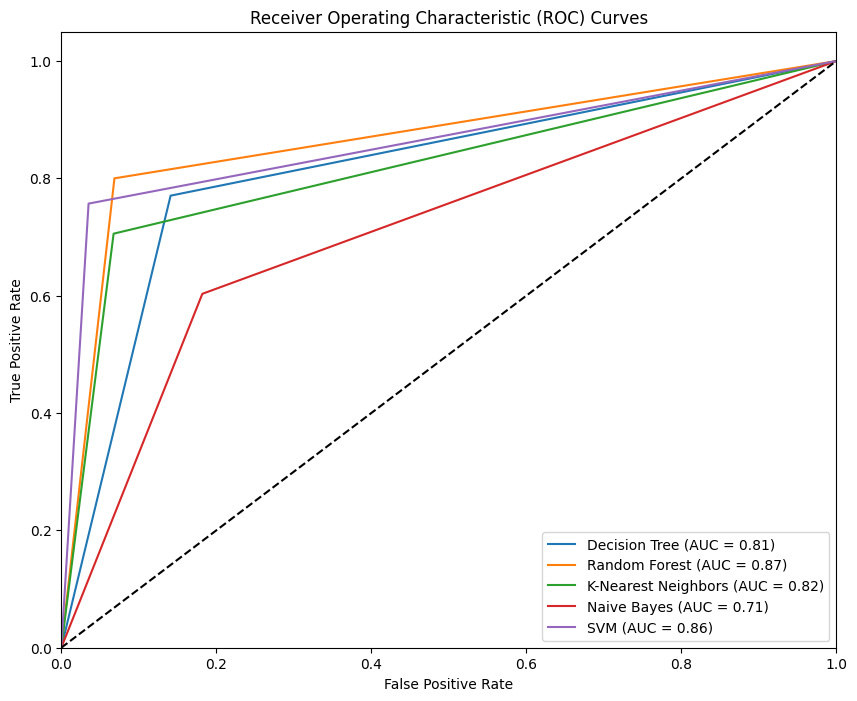

In [22]:

# Plot ROC curves for all classifiers
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Decision Tree (AUC = %0.2f)' % roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors (AUC = %0.2f)' % knn_roc_auc)
plt.plot(gnb_fpr, gnb_tpr, label='Naive Bayes (AUC = %0.2f)' % gnb_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
